In [1]:
from tabulate import tabulate
from skimage import io
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from pyXSteam.XSteam import XSteam
steamTable = XSteam(XSteam.UNIT_SYSTEM_MKS)

### Cálculo energético y exergético de Ciclo Rankine Ideal Real

Text(0.5, 1.0, 'Diagrama T-S')

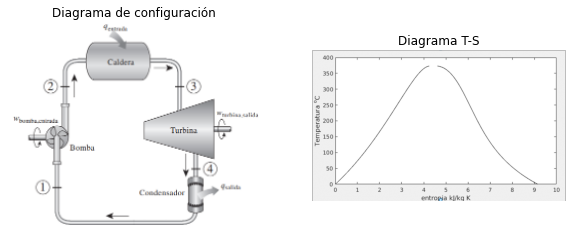

In [2]:
image01 = io.imread('../fig/RI_E.png')/255.0
image02 = io.imread('../fig/TS_RIEx.png')/255.0
fig = plt.figure(figsize=(10,7))
fig.add_subplot(1,2,1)
plt.imshow(image01,vmin=0,vmax=1)
plt.axis('off')
plt.title('Diagrama de configuración')
fig.add_subplot(1,2,2)
plt.imshow(image02,vmin=0,vmax=1)
plt.axis('off')
plt.title('Diagrama T-S')

### Datos iniciales

In [3]:
T_H = 300 
T_L = 55
EfiIsoTur = 0.9 #Eficiencia isoentrópica de la turbina
EfiIsoBomb = 0.8 #Eficiencia isoentrópica de la bomba

### Punto 3

In [4]:
P3 = 1.6298 #kpa
P_3 = 0.016298 #bar
H_P3 = (steamTable.h_pt(P3,T_H))
S_P3 = (steamTable.s_pt(P3,T_H))

### Punto 1

In [5]:
H_P1 = (steamTable.hL_t(T_L))
P1 = (steamTable.psat_t(T_L))
S1 = (steamTable.sL_t(T_L))
V1 = (steamTable.vL_t(T_L))

### Cálculo ideal

In [10]:
S4_s = S_P3
H4_s = (steamTable.h_ps(P1,S4_s))
Wideal_turbina = H_P3 - H4_s
H4_biprima = H_P3 - EfiIsoTur * (Wideal_turbina)
S4_biprima = (steamTable.s_ph(P1,H4_biprima))

### Punto 2 

In [12]:
S2 = S1 
H2 = (steamTable.h_ps(P3,S1))
Wideal_bomba = H2 - H_P1
H2_triprima = (Wideal_bomba/EfiIsoBomb) + H_P1
S2_triprima = (steamTable.s_ph(P3,H2_triprima))

### Balance de energía para cada componente

In [8]:
Q_caldera = H_P3 - H2_triprima
W_turbina = H_P3 - H4_biprima
W_bomba = V1 * (P3-P1)
Q_condensador = H4_biprima - H_P1
Eficiencia = W_turbina/Q_caldera
EfiCarnot = 1 - ((T_L + 273)/(T_H+273))
RelPres = P1/P3

### Condiciones del entorno

In [28]:
T_o = 25
P_o = 1.01325 #bar
H_o = (steamTable.h_pt(P_o,T_o))
S_o = (steamTable.s_pt(P_o,T_o))

### Balance exergético en turbina y bomba

In [30]:
Eph_bomba = (H2_triprima - H_o)-((T_o+273)*(S2_triprima - S_o))
Eph_turbina = (H4_biprima - H_o)-((T_o+273)*(S4_biprima - S_o))
Eph_turbina

229.4898776854502